# Statistical Verification and Visualization
### Assignment: Verification of Inequalities and Gaussian Properties

This notebook covers the following topics:
1.  **Inequalities:** Verification of Markov's and Chebyshev's inequalities.
2.  **1D Gaussian:** Verifying additive and scaling properties; sampling and statistics.
3.  **2D Gaussian:** Scatter plots, sample statistics, and 3D density visualization.
4.  **Distribution Comparison:** Visualizing Gaussian, Laplace, and Uniform distributions with identical mean and variance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

# Set a random seed for reproducibility
np.random.seed(42)
plt.style.use('ggplot')

## 1. Verify Markov's and Chebyshev's Inequalities

### Markov's Inequality
If $X$ is a non-negative random variable and $a > 0$, then:
$$P(X \geq a) \leq \frac{E[X]}{a}$$

### Chebyshev's Inequality
If $X$ is a random variable with finite mean $\mu$ and finite non-zero variance $\sigma^2$, then for any real number $k > 0$:
$$P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}$$

In [3]:
def verify_markov(data, a):
    if np.any(data < 0):
        raise ValueError("Markov's inequality requires non-negative random variables.")
    
    mean_val = np.mean(data)
    prob_observed = np.mean(data >= a)
    bound = mean_val / a
    
    print(f"Markov Check (a={a}):")
    print(f"  P(X >= {a}) observed: {prob_observed:.4f}")
    print(f"  Markov Bound (E[X]/a): {bound:.4f}")
    print(f"  Verified? {prob_observed <= bound}\n")

def verify_chebyshev(data, k):
    mu = np.mean(data)
    sigma = np.std(data)
    
    dist = np.abs(data - mu)
    threshold = k * sigma
    
    prob_observed = np.mean(dist >= threshold)
    bound = 1 / (k**2)
    
    print(f"Chebyshev Check (k={k}):")
    print(f"  P(|X - mu| >= {k}*sigma) observed: {prob_observed:.4f}")
    print(f"  Chebyshev Bound (1/k^2): {bound:.4f}")
    print(f"  Verified? {prob_observed <= bound}\n")

N = 10000
data_markov = np.random.chisquare(df=5, size=N)

# Verify Markov
verify_markov(data_markov, a=10)

# Verify Chebyshev
data_chebyshev = np.random.normal(loc=0, scale=1, size=N)
verify_chebyshev(data_chebyshev, k=2)
verify_chebyshev(data_chebyshev, k=3)


Markov Check (a=10):
  P(X >= 10) observed: 0.0768
  Markov Bound (E[X]/a): 0.5041
  Verified? True

Chebyshev Check (k=2):
  P(|X - mu| >= 2*sigma) observed: 0.0435
  Chebyshev Bound (1/k^2): 0.2500
  Verified? True

Chebyshev Check (k=3):
  P(|X - mu| >= 3*sigma) observed: 0.0024
  Chebyshev Bound (1/k^2): 0.1111
  Verified? True



## 2. 1D Gaussian Properties

We will verify three key properties:
1.  **Additivity:** Sum of two independent Gaussians is Gaussian.
    * $X \sim \mathcal{N}(\mu_1, \sigma_1^2), Y \sim \mathcal{N}(\mu_2, \sigma_2^2) \implies X+Y \sim \mathcal{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$
2.  **Scaling:** Multiplying a Gaussian by a constant results in a Gaussian.
    * $aX \sim \mathcal{N}(a\mu_1, a^2\sigma_1^2)$
3.  **Sampling:** Comparing sample statistics to theoretical parameters.

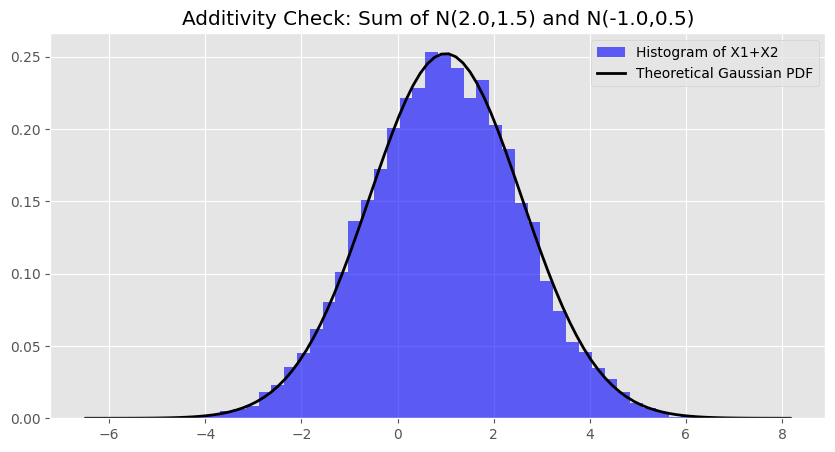

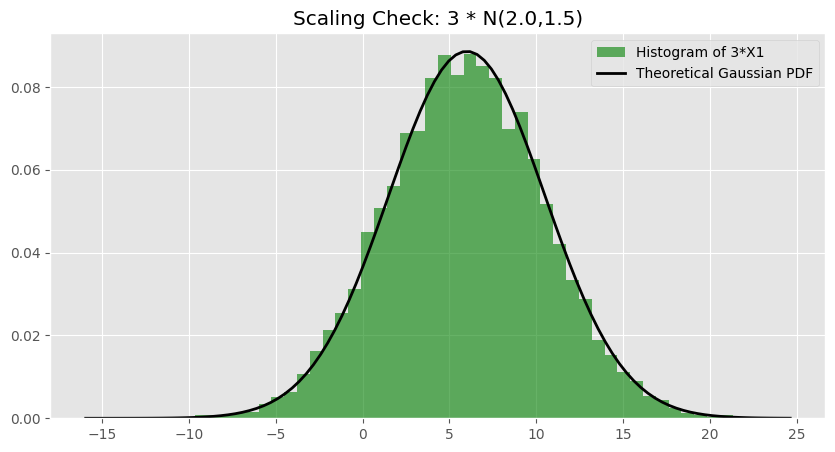

Sampling Check for N(2.0, 1.5^2):
  Theoretical Mean: 2.0, Sample Mean: 1.9634
  Theoretical Variance: 2.25, Sample Variance: 2.2702


In [4]:
# Setup
N = 10000
mu1, sigma1 = 2.0, 1.5
mu2, sigma2 = -1.0, 0.5

# a. Verify Additivity
X1 = np.random.normal(mu1, sigma1, N)
X2 = np.random.normal(mu2, sigma2, N)
X_sum = X1 + X2

expected_mu_sum = mu1 + mu2
expected_std_sum = np.sqrt(sigma1**2 + sigma2**2)

plt.figure(figsize=(10, 5))
plt.hist(X_sum, bins=50, density=True, alpha=0.6, color='blue', label='Histogram of X1+X2')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, expected_mu_sum, expected_std_sum)
plt.plot(x, p, 'k', linewidth=2, label='Theoretical Gaussian PDF')
plt.title(f'Additivity Check: Sum of N({mu1},{sigma1}) and N({mu2},{sigma2})')
plt.legend()
plt.show()

# b. Verify Scaling
c = 3
X_scaled = c * X1
expected_mu_scaled = c * mu1
expected_std_scaled = abs(c) * sigma1

plt.figure(figsize=(10, 5))
plt.hist(X_scaled, bins=50, density=True, alpha=0.6, color='green', label=f'Histogram of {c}*X1')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, expected_mu_scaled, expected_std_scaled)
plt.plot(x, p, 'k', linewidth=2, label='Theoretical Gaussian PDF')
plt.title(f'Scaling Check: {c} * N({mu1},{sigma1})')
plt.legend()
plt.show()

# c. Sample Statistics
sample_mean = np.mean(X1)
sample_var = np.var(X1)
print(f"Sampling Check for N({mu1}, {sigma1}^2):")
print(f"  Theoretical Mean: {mu1}, Sample Mean: {sample_mean:.4f}")
print(f"  Theoretical Variance: {sigma1**2}, Sample Variance: {sample_var:.4f}")

## 3. 2D Gaussian

We will generate samples from a Multivariate Normal Distribution.
* **Mean vector:** $\mu = [\mu_x, \mu_y]$
* **Covariance matrix:** $\Sigma = \begin{bmatrix} \sigma_x^2 & \rho \sigma_x \sigma_y \\ \rho \sigma_x \sigma_y & \sigma_y^2 \end{bmatrix}$

2D Gaussian Statistics:
  Sample Mean: [0.98757311 1.98353533]
  Sample Covariance Matrix:
[[1.98758657 0.80554372]
 [0.80554372 1.04340138]]


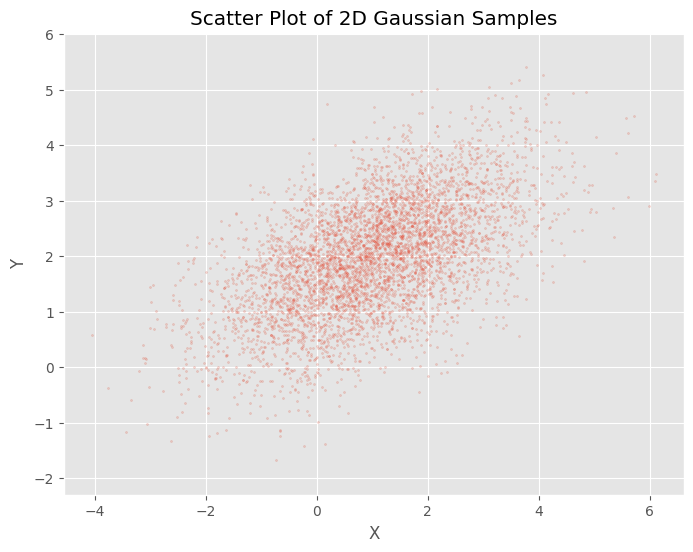

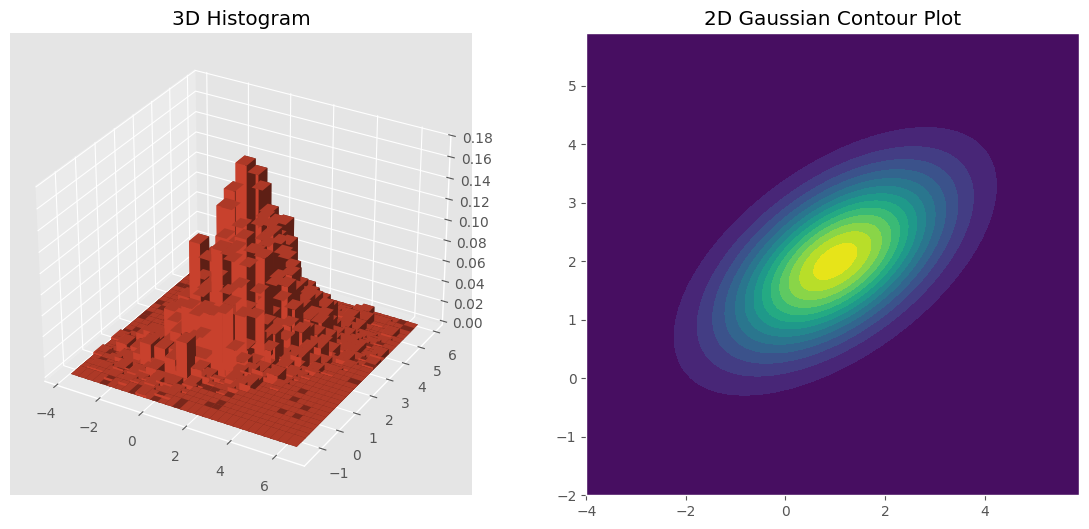

In [5]:
# Parameters
mean_2d = [1, 2]
cov_2d = [[2.0, 0.8], 
          [0.8, 1.0]]  # Positive correlation

# a. Generate Data and Statistics
data_2d = np.random.multivariate_normal(mean_2d, cov_2d, size=5000)
x_2d, y_2d = data_2d.T

print("2D Gaussian Statistics:")
print(f"  Sample Mean: {np.mean(data_2d, axis=0)}")
print(f"  Sample Covariance Matrix:\n{np.cov(x_2d, y_2d)}")

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_2d, y_2d, alpha=0.2, s=2)
plt.title("Scatter Plot of 2D Gaussian Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()

# b. 3D Visualizations
fig = plt.figure(figsize=(14, 6))

# i) 2D Histogram in 3D
ax1 = fig.add_subplot(121, projection='3d')
hist, xedges, yedges = np.histogram2d(x_2d, y_2d, bins=30, density=True)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 3d bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', shade=True)
ax1.set_title("3D Histogram")

# ii) Contour Plot (using theoretical PDF for smoothness)
ax2 = fig.add_subplot(122)
x_grid, y_grid = np.mgrid[-4:6:.1, -2:6:.1]
pos = np.dstack((x_grid, y_grid))
rv = stats.multivariate_normal(mean_2d, cov_2d)
ax2.contourf(x_grid, y_grid, rv.pdf(pos), levels=15, cmap='viridis')
ax2.set_title("2D Gaussian Contour Plot")
plt.show()

## 4. Visualization of Distributions (Same Mean and Variance)

We compare three distributions:
1.  **Gaussian (Normal)**
2.  **Laplace**
3.  **Uniform**

We enforce:
* Mean $\mu = 0$
* Variance $\sigma^2 = 1$

**Parameter Calculation:**
* **Gaussian:** Loc=0, Scale=1.
* **Laplace:** Variance $= 2b^2 = 1 \implies b = \sqrt{0.5}$.
* **Uniform:** Variance $= \frac{(B-A)^2}{12} = 1$. Since Mean is 0, $B = -A$. Range width is $\sqrt{12}$. So range is $[-\sqrt{3}, \sqrt{3}]$.

Variance Verification (Target = 1.0):
  Gaussian Variance: 0.9979
  Laplace Variance:  1.0074
  Uniform Variance:  0.9998


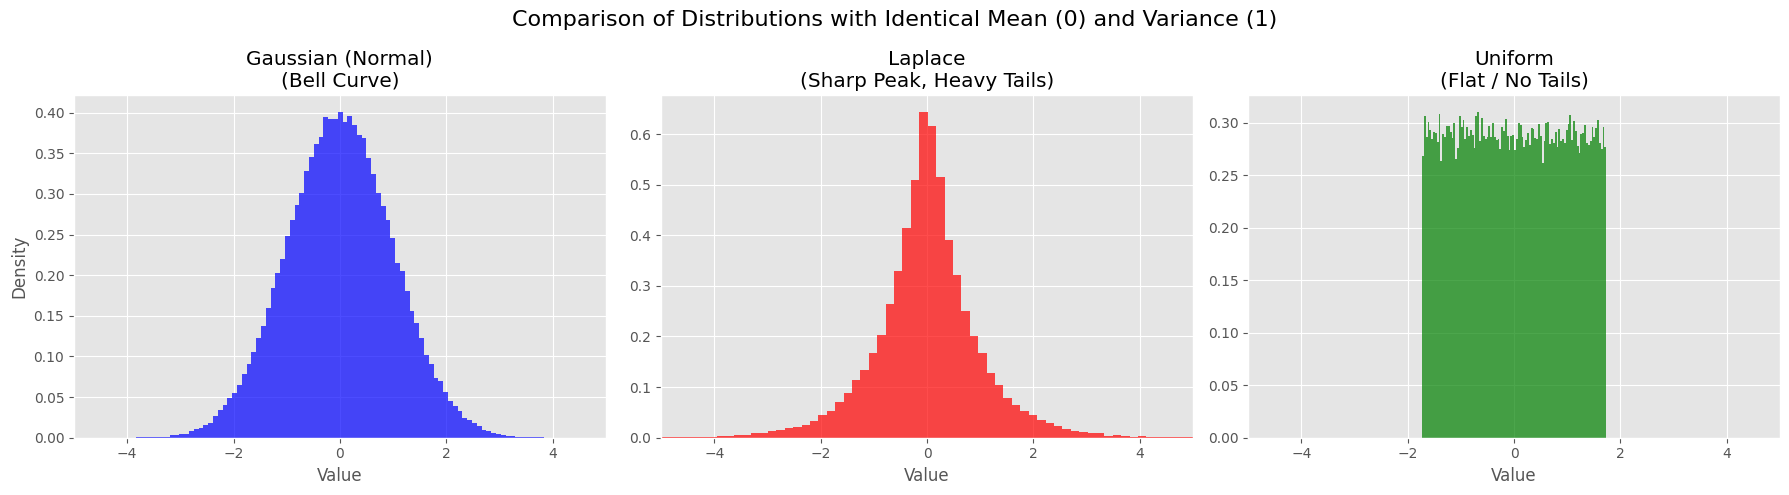

In [6]:
# Parameters
N_vis = 100000
target_mu = 0
target_var = 1

# 1. Gaussian (Normal) Generation
# Variance = scale^2  => scale = 1
data_gauss = np.random.normal(loc=0, scale=1, size=N_vis)

# 2. Laplace Generation
# Variance=2*scale^2 => 1 = 2 * scale^2 => scale = sqrt(0.5)
scale_laplace = np.sqrt(0.5)
data_laplace = np.random.laplace(loc=0, scale=scale_laplace, size=N_vis)

# 3. Uniform Generation
# Variance = (width^2) / 12 => 1 = width^2 / 12 => width = sqrt(12)
# limit = width / 2 = sqrt(3)
limit_uniform = np.sqrt(3)
data_uniform = np.random.uniform(low=-limit_uniform, high=limit_uniform, size=N_vis)

# Verify variances
print("Variance Verification (Target = 1.0):")
print(f"  Gaussian Variance: {np.var(data_gauss):.4f}")
print(f"  Laplace Variance:  {np.var(data_laplace):.4f}")
print(f"  Uniform Variance:  {np.var(data_uniform):.4f}")

# --- Plotting Separately ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Common Plotting Arguments
kwargs = dict(bins=100, density=True, alpha=0.7, edgecolor='none')

# 1. Plot Gaussian
axes[0].hist(data_gauss, color='blue', label='Gaussian', **kwargs)
axes[0].set_title('Gaussian (Normal)\n(Bell Curve)')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Value')
axes[0].set_xlim(-5, 5)

# 2. Plot Laplace
axes[1].hist(data_laplace, color='red', label='Laplace', **kwargs)
axes[1].set_title('Laplace\n(Sharp Peak, Heavy Tails)')
axes[1].set_xlabel('Value')
axes[1].set_xlim(-5, 5)

# 3. Plot Uniform
axes[2].hist(data_uniform, color='green', label='Uniform', **kwargs)
axes[2].set_title('Uniform\n(Flat / No Tails)')
axes[2].set_xlabel('Value')
axes[2].set_xlim(-5, 5)

plt.suptitle(f'Comparison of Distributions with Identical Mean ({target_mu}) and Variance ({target_var})', fontsize=16)
plt.tight_layout()
plt.show()